# seaborn - 기본 그래프

matplotlib을 기반으로 하는 python 데이터 시각화 라이브러리

matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가

주요 파라미터

| 파라미터 | 설명 |
|---|---|
| `data`ㅤ| 데이터 구조 입력. 일반적으로 데이터프레임 객체 |
| `x`, `y`ㅤ| x, y축의 값을 지정하는 변수<br/>`data`를 설정하지 않은 경우 리스트 등의 연속형 변수<br/>`data`를 설정한 경우 데이터프레임의 컬럼이름 |
| `hue` | 데이터를 구분하기 위한 그룹화 변수(범주형 변수)<br/>`data`를 설정한 경우 데이터프레임의 컬럼이름 |
| `size`ㅤ| 너비가 다른 선을 생성하는 그룹화 변수 (마커의 경우, 마커의 크기가 다르게 나타남) |
| `style`ㅤ| 다른 스타일의 마커 또는 선을 생성하는 그룹화 변수 |
| `palette`ㅤ| 색상 체계 선택 |

## #01. 기본 준비

패키지 설치

In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

그래프 전역 설정

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 기본 그래프

pie 그래프는 seaborn에서 제공되지 않음

1. 선 그래프

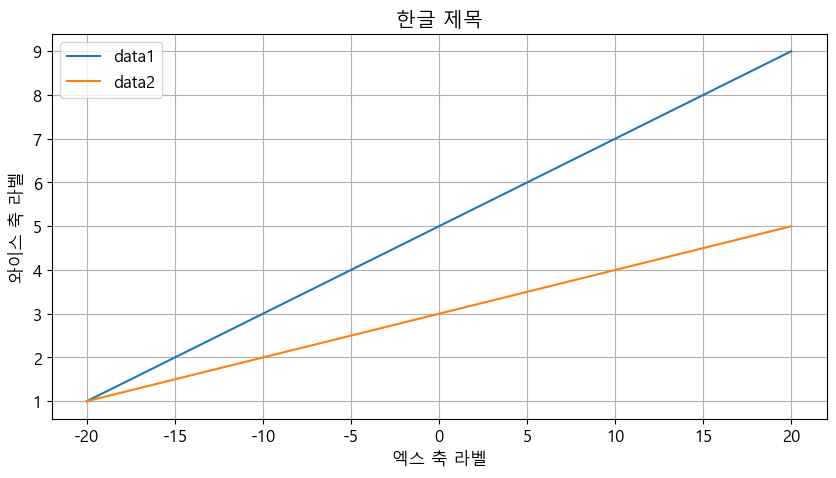

In [4]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(x=[-20,-10,0,10,20],y=[1,3,5,7,9], label='data1')
sb.lineplot(x=[-20,-10,0,10,20],y=[1,2,3,4,5], label='data2')

# 그 밖의 옵션은 matplotlib와 동일
plt.title("한글 제목")
plt.xlabel('엑스 축 라벨')
plt.ylabel('와이스 축 라벨')
plt.legend()
plt.grid()
plt.show()
plt.close()

2. 세로 막대 그래프

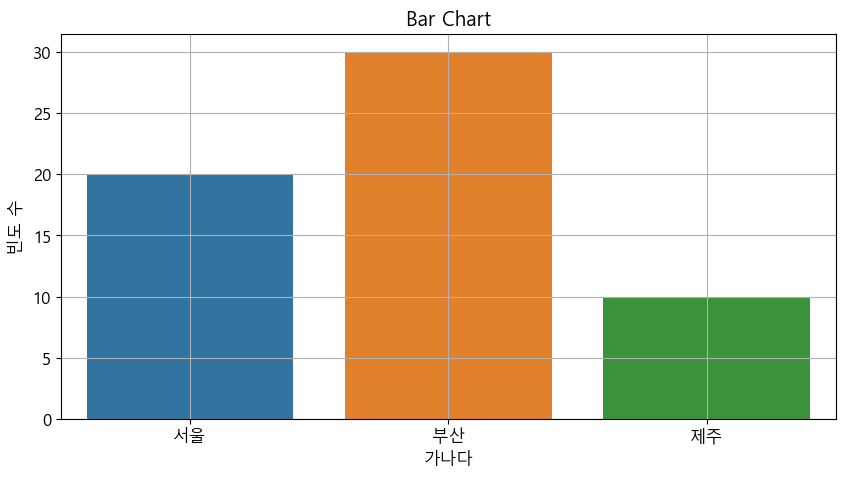

In [5]:
# 데이터 설정
x = ['서울', '부산', '제주']
y = [20,30,10]

sb.barplot(x=x, y=y)

plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

3. 가로 막대 그래프

기본 제공 팔레트

x축과 y축을 바꿔서 설정

>deep, muted, pastel, bright, dark, colorblind, Spectral

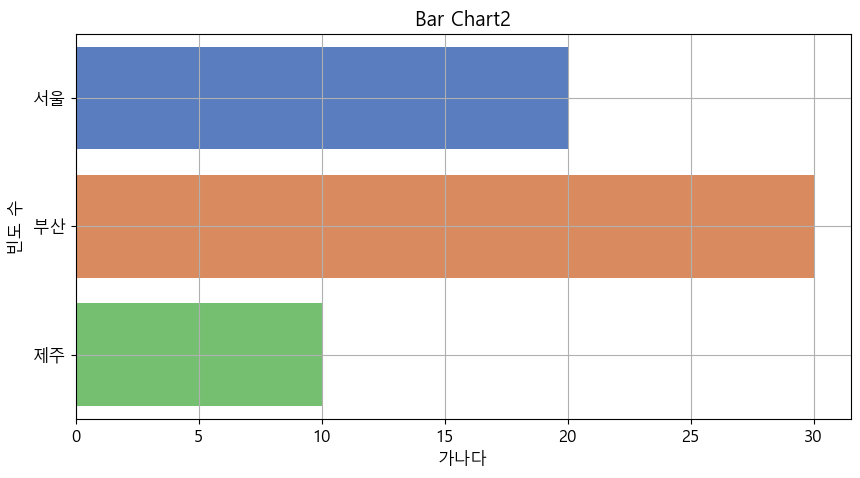

In [6]:
# 데이터 설정(barh와는 다르게 바꿀 필요 없음)
x = ['서울', '부산', '제주']
y = [20,30,10]

sb.barplot(x=y, y=x, label='data', palette='muted')

plt.title("Bar Chart2")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

4. 산점도 그래프

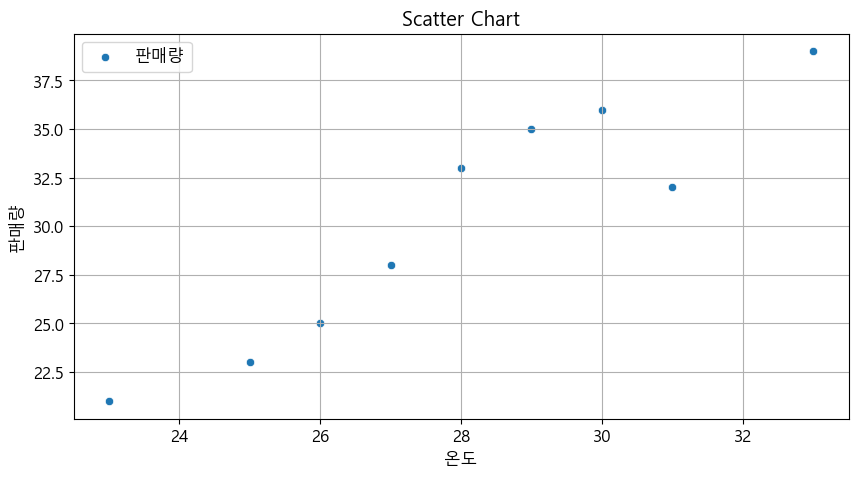

In [7]:
# 온도와 아이스크림 판매 수량
tmp = [23, 25, 26, 27, 28, 29, 30, 31, 33]
qty = [21, 23, 25, 28, 33, 35, 36, 32, 39]

sb.scatterplot(x=tmp, y=qty, label='판매량')

plt.title("Scatter Chart")
plt.xlabel("온도")
plt.ylabel("판매량")
plt.grid()
plt.show()
plt.close()

## #03. 데이터 프레임을 통한 그래프

1. 데이터 준비

In [8]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx")
df

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875
5,2010,226878,5505,352458
6,2011,221711,5229,341391
7,2012,223656,5392,344565
8,2013,215354,5092,328711
9,2014,223552,4762,337497


데이터를 확인 후 index를 설정

In [9]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


2. 선 그래프

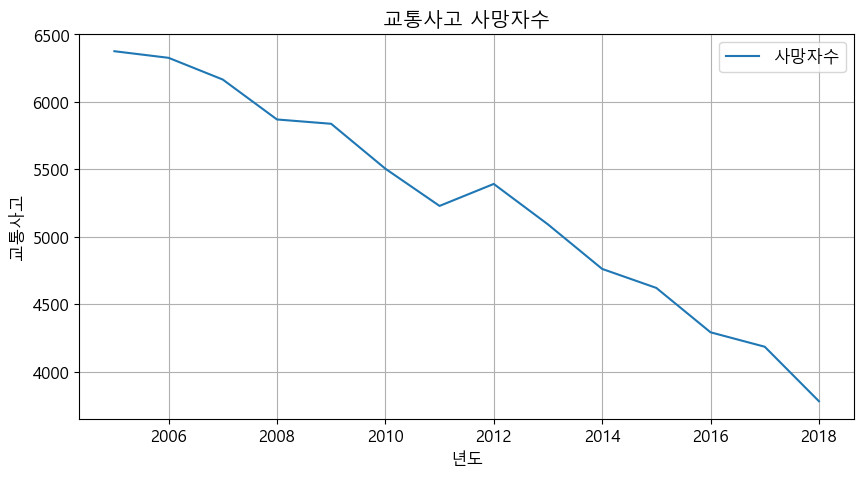

In [11]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)

sb.lineplot(data=df, x=df.index, y='사망자수', label='사망자수')

plt.title('교통사고 사망자수')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

3. 막대 그래프

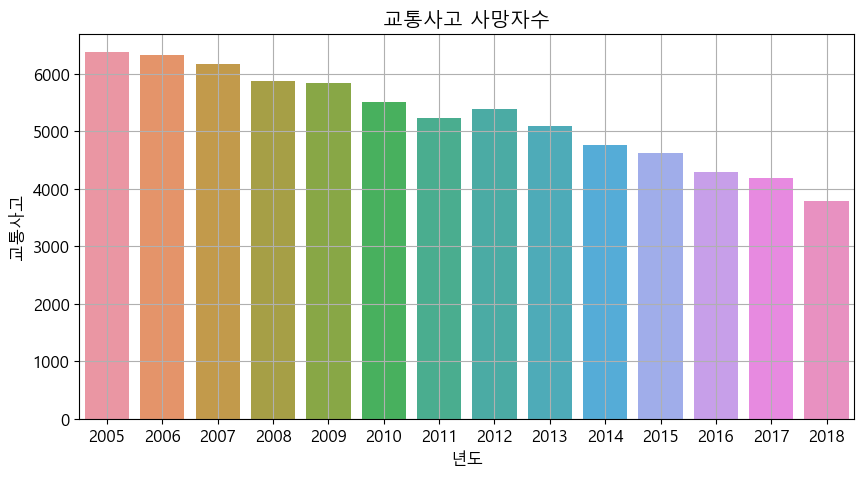

In [12]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df, x=df.index, y='사망자수')

plt.title('교통사고 사망자수')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

4. 산점도 그래프

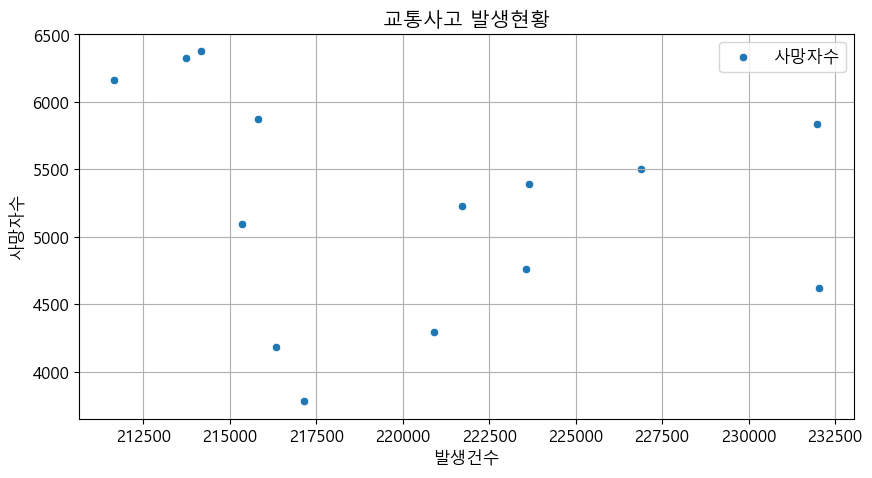

In [13]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.scatterplot(data=df, x='발생건수', y='사망자수', label='사망자수')

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")      # x축 제목
plt.ylabel("사망자수")   # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

5. 추세선을 포함한 산점도 그래프

추세선 주변에 보이는 구간은 95% 신뢰 구간

fit_reg=False를 추가 시 추세선이 제외되어\
scatterplot 메서드와 동일한 결과를 보여준다(기본값=True)

ci 파라미터는 신뢰수준을 설정하며 기본값은 95

line_kws 파라미터는 선의 색상, scatter_kws는 점의 색상

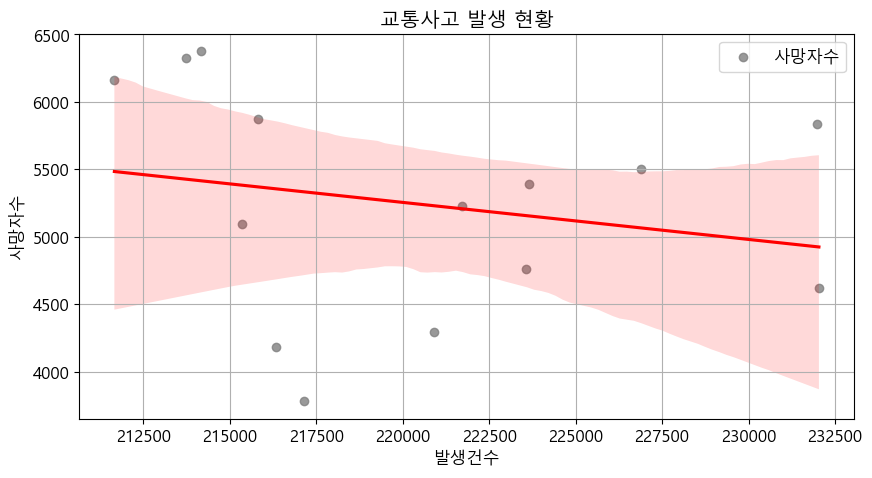

In [17]:
# 추세선을 함께 보여주는 산점도 그래프 생성
sb.regplot(data=df, x='발생건수', y='사망자수', label='사망자수',
           line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

plt.title("교통사고 발생 현황")
plt.xlabel("발생건수")
plt.ylabel("사망자수")
plt.legend()
plt.grid()
plt.show()
plt.close()

5. 서브플롯에 기반한 선 그래프 - 2개의 y 값

> 서브 플롯을 사용하지 않을 경우 sb.lineplot() 함수에서 ax 파라미터 제거

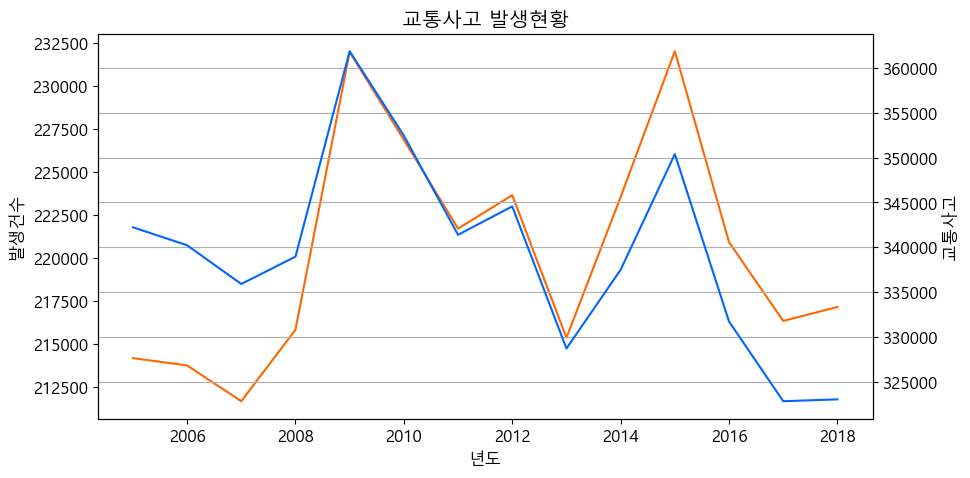

In [33]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(data=df, x=df.index, y='발생건수', color='#ff6600', ax=ax1)
sb.lineplot(data=df, x=df.index, y='부상자수', color='#0066ff', ax=ax2)

plt.title("교통사고 발생현황")
plt.xlabel("년도")
plt.ylabel("교통사고")
plt.grid()
plt.show()
plt.close()